<ipython-input-1-bef8e3785a5e>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  selected_data = selected_data.fillna(method='ffill')
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


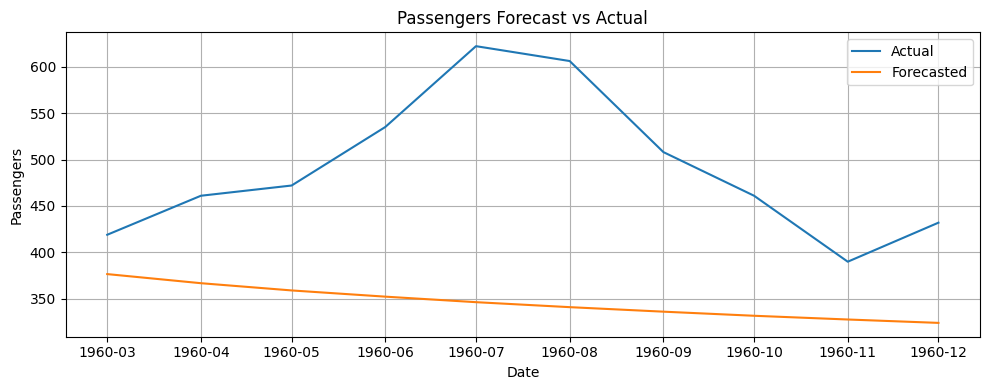

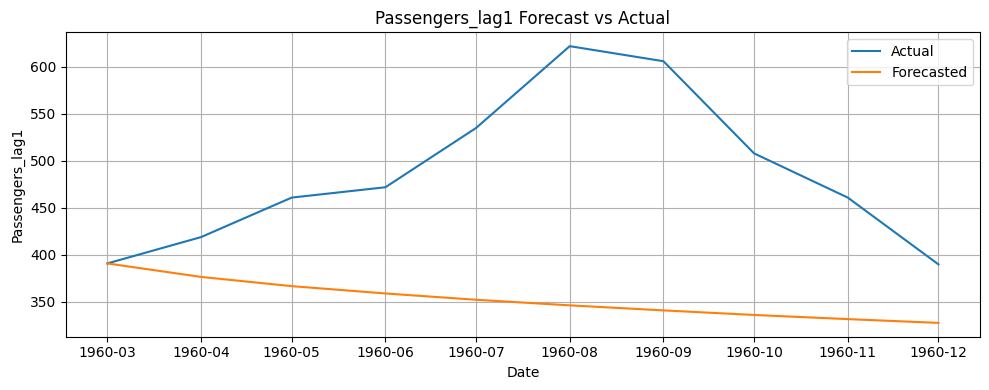

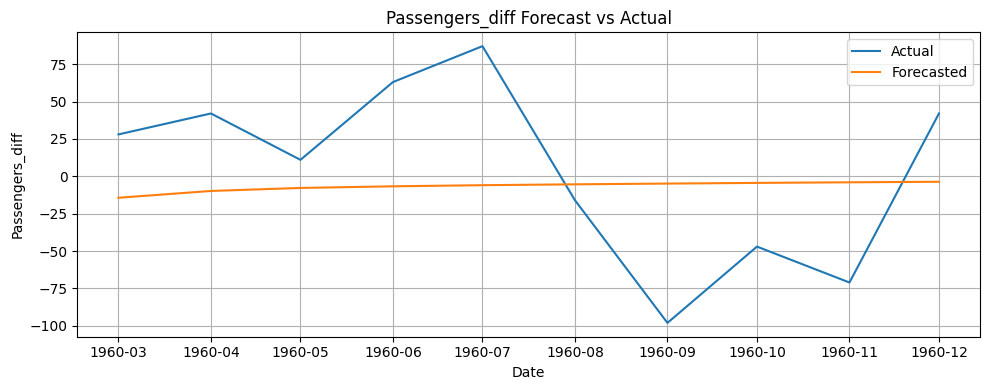

RMSE for Passengers: 162.66
RMSE for Passengers_lag1: 159.04
RMSE for Passengers_diff: 59.58


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv("/content/AirPassengers (2).csv", parse_dates=['Month'], index_col='Month')

# Create synthetic multivariate dataset using lag features
df['Passengers'] = df['#Passengers']
df['Passengers_lag1'] = df['Passengers'].shift(1)
df['Passengers_diff'] = df['Passengers'].diff()

# Drop initial NaN values caused by shifting
selected_data = df[['Passengers', 'Passengers_lag1', 'Passengers_diff']].dropna()

# Forward fill if needed (generally clean after diff/shift)
selected_data = selected_data.fillna(method='ffill')

# Forecast horizon
n_obs = 10
df_train = selected_data[:-n_obs]
df_test = selected_data[-n_obs:]

# Fit VAR model
model = VAR(df_train)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(df_train.values[-model_fit.k_ar:], steps=n_obs)
forecast_df = pd.DataFrame(forecast, index=df_test.index, columns=selected_data.columns)

# Plotting actual vs forecasted
for column in selected_data.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(df_test[column], label='Actual')
    plt.plot(forecast_df[column], label='Forecasted')
    plt.title(f'{column} Forecast vs Actual')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Print RMSE
for column in selected_data.columns:
    rmse = np.sqrt(mean_squared_error(df_test[column], forecast_df[column]))
    print(f'RMSE for {column}: {rmse:.2f}')
